# Projet 2 - 01 : Cleaning Notebook

1. Missing values
2. Non numeric features
3. Duplicates
4. Outliers
5. Numeric values imputation
6. Save cleaned CSV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


plt.style.use('fivethirtyeight')

pd.set_option('display.float_format', lambda x: f'{x}.3f')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [2]:
# Data Import
data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')
print("Initial dataset : {} rows / {} columns".format(data.shape[0], data.shape[1]))
data.head()

C:\Users\Flooow\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,12,18,19,20,21,22,26,27,28,30,51,63) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Initial dataset : 1555554 rows / 183 columns


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,origins_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,brand_owner,main_category,main_category_fr,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","À compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,375.000,1569.000,NaN,7.000,3.080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.100,15.000,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# set index
data.set_index('code', inplace=True)

In [4]:
data.replace('nan', np.nan, inplace=True)

**The dataset is wide, I immediately delete unnecessary columns to lighten the processing**

In [5]:
# useless columns : images + url + english duplicates + tags
cols = ['creator',
        'url',
        'created_t',
        'last_modified_t',
        'image_url',
        'image_small_url',
        'image_ingredients_url',
        'image_ingredients_small_url',
        'image_nutrition_url',
        'image_nutrition_small_url',
        'categories',
        'labels',
        'countries',
        'states',
        'states_fr',
        'main_category']

# columns that contains a list of tags
for col in data.columns:
    if col.endswith('_tags'):
        cols.append(col)
        
# drop these columns
data = data.drop(columns=cols)
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))                       

Remaining data : 1555554 rows / 152 columns


## 1. Missing values

In [6]:
# Number of null values for each column
data.isnull().sum().sort_values()

created_datetime                   0
last_modified_datetime             0
pnns_groups_2                   3595
countries_fr                    5162
pnns_groups_1                  18549
                              ...   
melissic-acid_100g           1555554
elaidic-acid_100g            1555554
mead-acid_100g               1555554
ingredients_from_palm_oil    1555554
gondoic-acid_100g            1555554
Length: 152, dtype: int64

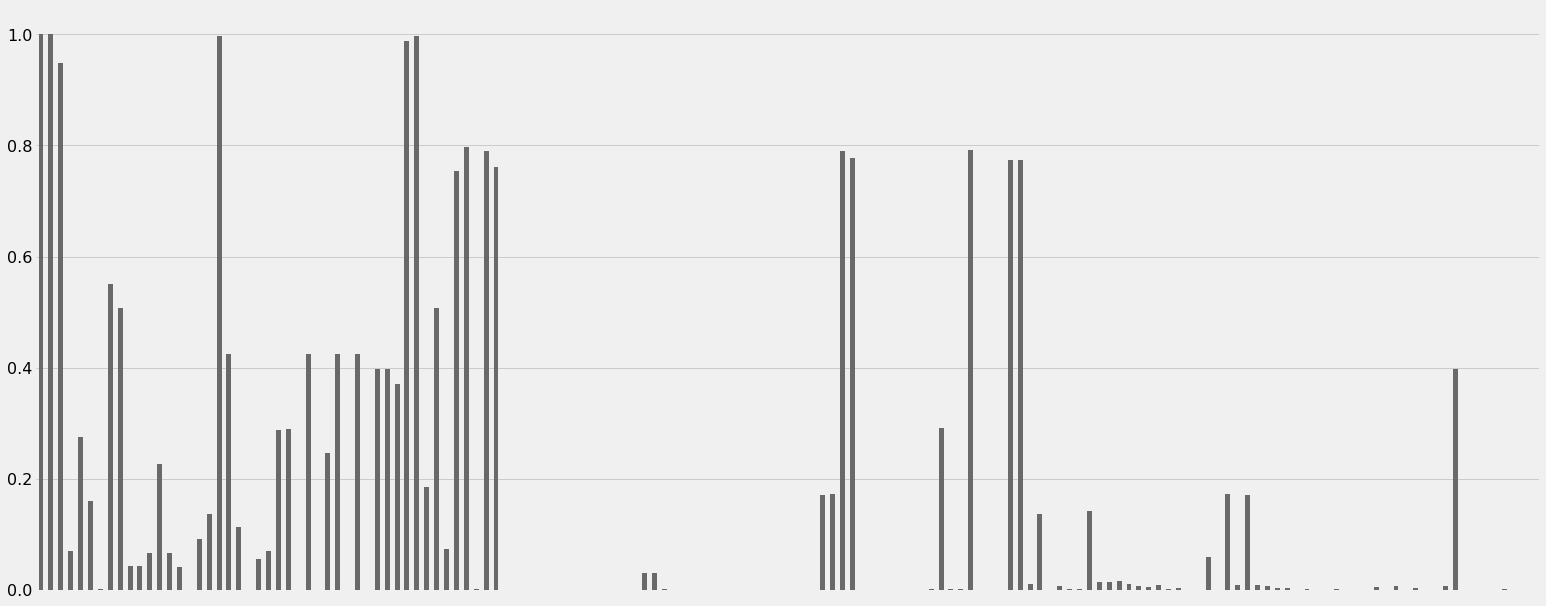

In [7]:
msno.bar(data)

<code>ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (152).</code>  
This error on the previous cell is caused by the version 3.3.0 of Matplotlib. To solve it, I had to downgrade Matplotib package to v3.2.1

**There is a lot of empty columns. I'll drop those that do not contain enough data (<20%).**

In [8]:
# drop columns with less than 20% data 
data = data.dropna(axis=1, thresh= len(data)*0.2, how='all')
# drop empty rows
data = data.dropna(axis=0, how='all')
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))                       

Remaining data : 1555554 rows / 32 columns


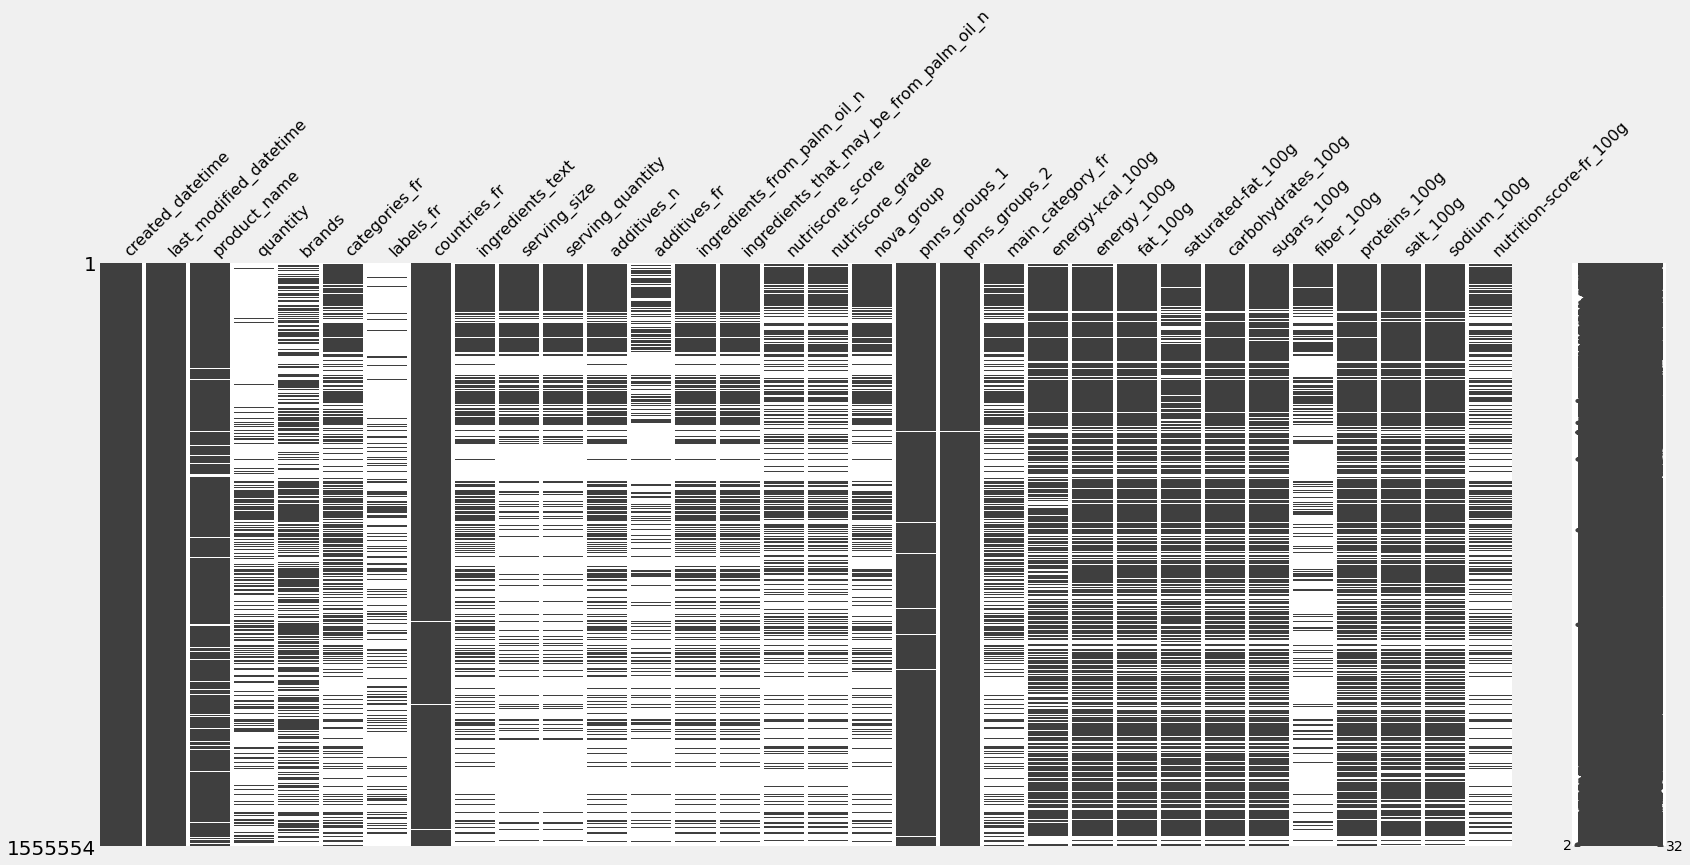

In [9]:
msno.matrix(data)

In [10]:
# Fill the 'product_name' column
data['product_name'].fillna(value='product name unavailable', inplace=True)

created_datetime                                 0
last_modified_datetime                           0
product_name                                     0
pnns_groups_2                                 3595
countries_fr                                  5162
pnns_groups_1                                18549
energy_100g                                 316327
proteins_100g                               324815
fat_100g                                    325881
carbohydrates_100g                          326446
sugars_100g                                 347388
salt_100g                                   353126
sodium_100g                                 353131
saturated-fat_100g                          371979
energy-kcal_100g                            383880
brands                                      699923
main_category_fr                            765653
categories_fr                               765653
additives_n                                 894775
ingredients_from_palm_oil_n    

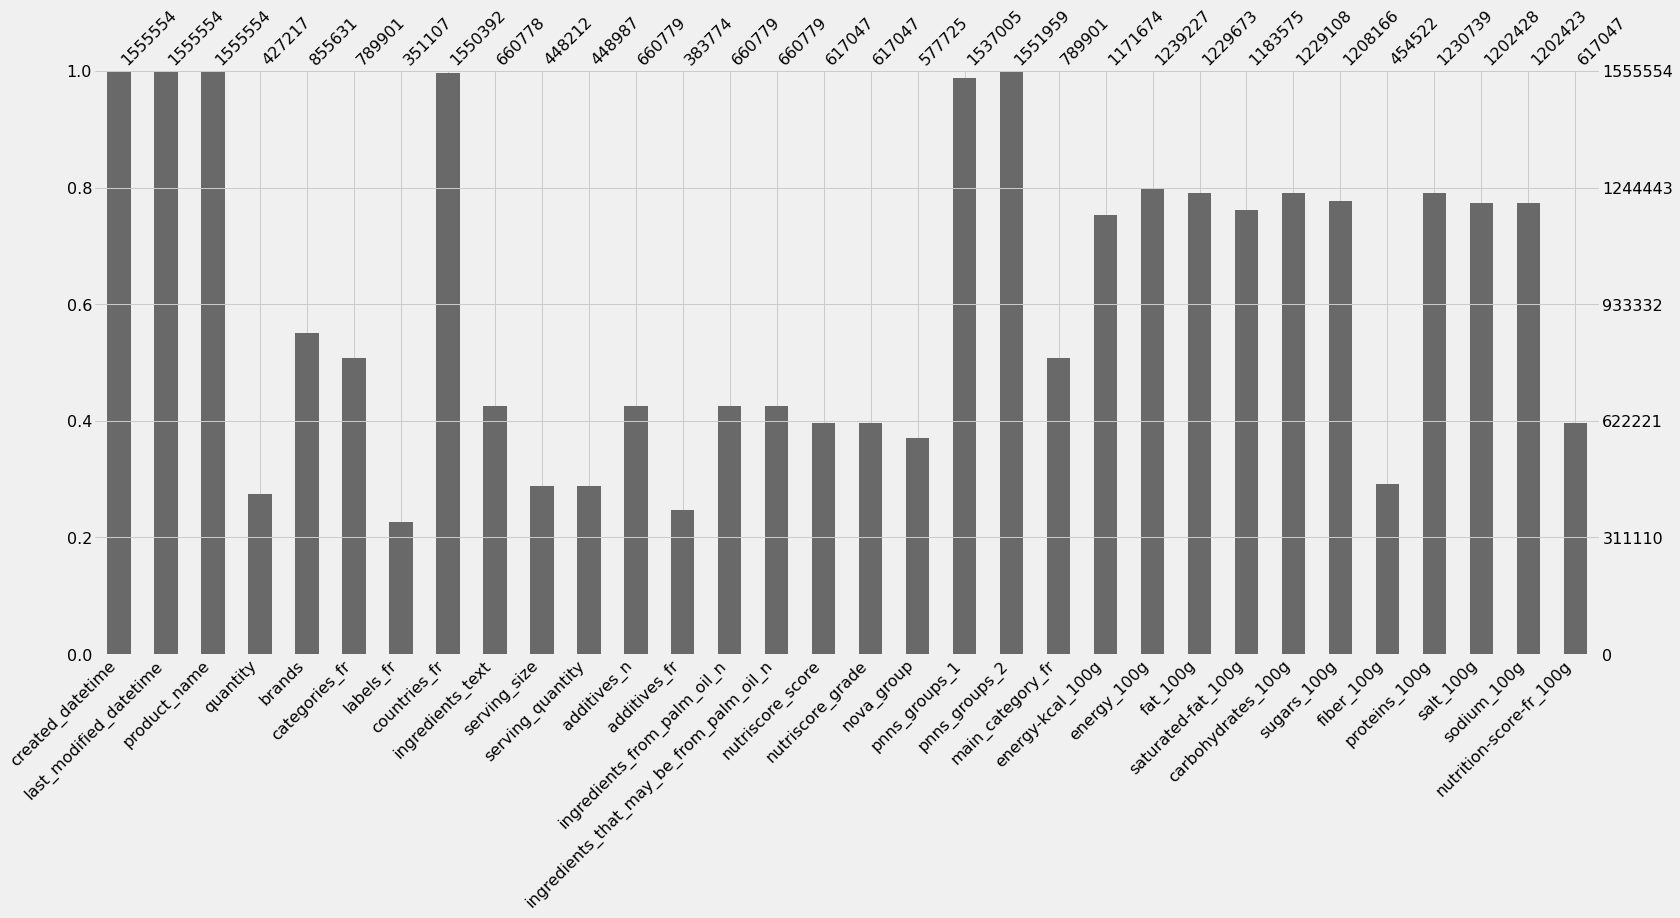

In [11]:
print(data.isnull().sum().sort_values())
msno.bar(data)

## 2. Non numeric features

In [12]:
data.dtypes.sort_values()

nutriscore_score                           float64
salt_100g                                  float64
proteins_100g                              float64
fiber_100g                                 float64
sugars_100g                                float64
carbohydrates_100g                         float64
saturated-fat_100g                         float64
fat_100g                                   float64
energy_100g                                float64
energy-kcal_100g                           float64
nova_group                                 float64
sodium_100g                                float64
ingredients_that_may_be_from_palm_oil_n    float64
nutrition-score-fr_100g                    float64
additives_n                                float64
serving_quantity                           float64
ingredients_from_palm_oil_n                float64
additives_fr                                object
last_modified_datetime                      object
product_name                   

In [13]:
# parsing datetime
data['created_datetime'] = pd.to_datetime(data['created_datetime'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
data['last_modified_datetime'] = pd.to_datetime(data['last_modified_datetime'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

In [14]:
# check for parsing problems
dates_problems = data[['created_datetime', 'last_modified_datetime']].isnull().sum()
print(dates_problems)
for col in data[['created_datetime', 'last_modified_datetime']].columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(method='ffill', inplace=True)
del dates_problems

created_datetime          0
last_modified_datetime    0
dtype: int64


In [15]:
# nova_group = categorical variable
data['nova_group'] = data['nova_group'].astype(str)

In [16]:
# lower strings
for col in data.select_dtypes(include=object).columns:
    data[col] = data[col].str.lower()
        
data.select_dtypes(include=object)

,product_name,quantity,brands,categories_fr,labels_fr,countries_fr,ingredients_text,serving_size,additives_fr,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,main_category_fr
code,,,,,,,,,,,,,,
0000000000017,vitória crackers,NaN,NaN,NaN,NaN,france,NaN,NaN,NaN,NaN,nan,unknown,unknown,NaN
0000000000031,cacao,130 g,NaN,NaN,NaN,france,NaN,NaN,NaN,NaN,nan,unknown,unknown,NaN
000000000003327986,filetes de pollo empanado,NaN,NaN,NaN,NaN,espagne,NaN,NaN,NaN,NaN,nan,unknown,unknown,NaN
0000000000100,moutarde au moût de raisin,100g,courte paille,"epicerie,condiments,sauces,moutardes",delois-france,france,eau graines de téguments de moutarde vinaigre ...,NaN,NaN,d,nan,fat and sauces,dressings and sauces,moutardes
00000000001111111111,sfiudwx,dgesc,watt,xsf,NaN,france,NaN,NaN,NaN,NaN,nan,unknown,unknown,xsf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999999901,scs,NaN,NaN,NaN,NaN,royaume-uni,NaN,NaN,NaN,NaN,nan,unknown,unknown,NaN
9999999910128,sandwich club rillette poisson combava,NaN,NaN,NaN,NaN,la réunion,NaN,NaN,NaN,NaN,nan,unknown,unknown,NaN
999999999,thé noir bio darjeeling,NaN,pagès,NaN,NaN,france,NaN,NaN,NaN,NaN,nan,unknown,unknown,NaN


In [17]:
data.dtypes.sort_values()

created_datetime                           datetime64[ns]
salt_100g                                         float64
proteins_100g                                     float64
fiber_100g                                        float64
sugars_100g                                       float64
carbohydrates_100g                                float64
saturated-fat_100g                                float64
fat_100g                                          float64
energy_100g                                       float64
energy-kcal_100g                                  float64
sodium_100g                                       float64
ingredients_that_may_be_from_palm_oil_n           float64
ingredients_from_palm_oil_n                       float64
nutriscore_score                                  float64
additives_n                                       float64
last_modified_datetime                     datetime64[ns]
nutrition-score-fr_100g                           float64
serving_quanti

## 3. Duplicates

In [18]:
# Rows fully duplicated
print("Entire rows duplicated : ", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))      

Entire rows duplicated :  1100
Remaining data : 1554454 rows / 32 columns


In [19]:
# Drop rows with same index
print("Rows with the same index : ", data.index.duplicated().sum())
data = data[~data.index.duplicated(keep='first')]

Rows with the same index :  359


In [20]:
# Duplicates based on key features
key1 = ['product_name', 'nutrition-score-fr_100g', 'energy_100g', 'energy-kcal_100g', 'proteins_100g', 'carbohydrates_100g', 'fiber_100g', 'fat_100g', 'saturated-fat_100g', 'salt_100g', 'sodium_100g']
# key2 = ['product_name', 'brands', 'serving_size', 'countries_fr', 'nutrition-score-fr_100g']
data.drop_duplicates(subset=key1, inplace=True)

In [21]:
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))                       

Remaining data : 1330820 rows / 32 columns


## 4. Outliers

In [22]:
data.describe()

,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,411906.000,606628.000,606628.000,606628.000,571422.000,1088211.000,1154136.000,1144984.000,1105501.000,1144444.000,1127049.000,426674.000,1146051.000,1116789.000,1116784.000,571422.000
mean,26974870749908524.000,2.083,0.022,0.072,9.235,7998592.994,5775366931530503064443154146596487168.000,13.530,123021151.372,28.971,13.880,2.994,8.352,1.809,0.724,9.235
std,17312445988687437824.000,2.939,0.149,0.308,8.883,8334050421.526,6204518384844989118207557271350253977600.000,95.220,129347887202.809,29.171,19.920,6.399,10.842,76.816,30.724,8.883
min,0.000,0.000,0.000,0.000,-15.000,0.000,0.000,0.000,0.000,0.000,-1.000,-20.000,-500.000,0.000,0.000,-15.000
25%,28.000,0.000,0.000,0.000,2.000,101.000,418.000,0.700,0.100,4.000,0.800,0.000,1.300,0.062,0.025,2.000
50%,50.000,1.000,0.000,0.000,10.000,264.000,1092.000,6.980,1.880,16.670,4.000,1.600,5.800,0.535,0.214,10.000
75%,113.000,3.000,0.000,0.000,16.000,400.000,1674.000,21.000,7.140,54.000,20.000,3.600,12.000,1.330,0.532,16.000
max,11111111111111100858368.000,39.000,3.000,6.000,40.000,8693855001005.000,6665558888888888950360610417759390841962496.000,100000.111,136000000238419.000,5310.000,1350.000,2020.000,2500.000,66700.000,26700.000,40.000


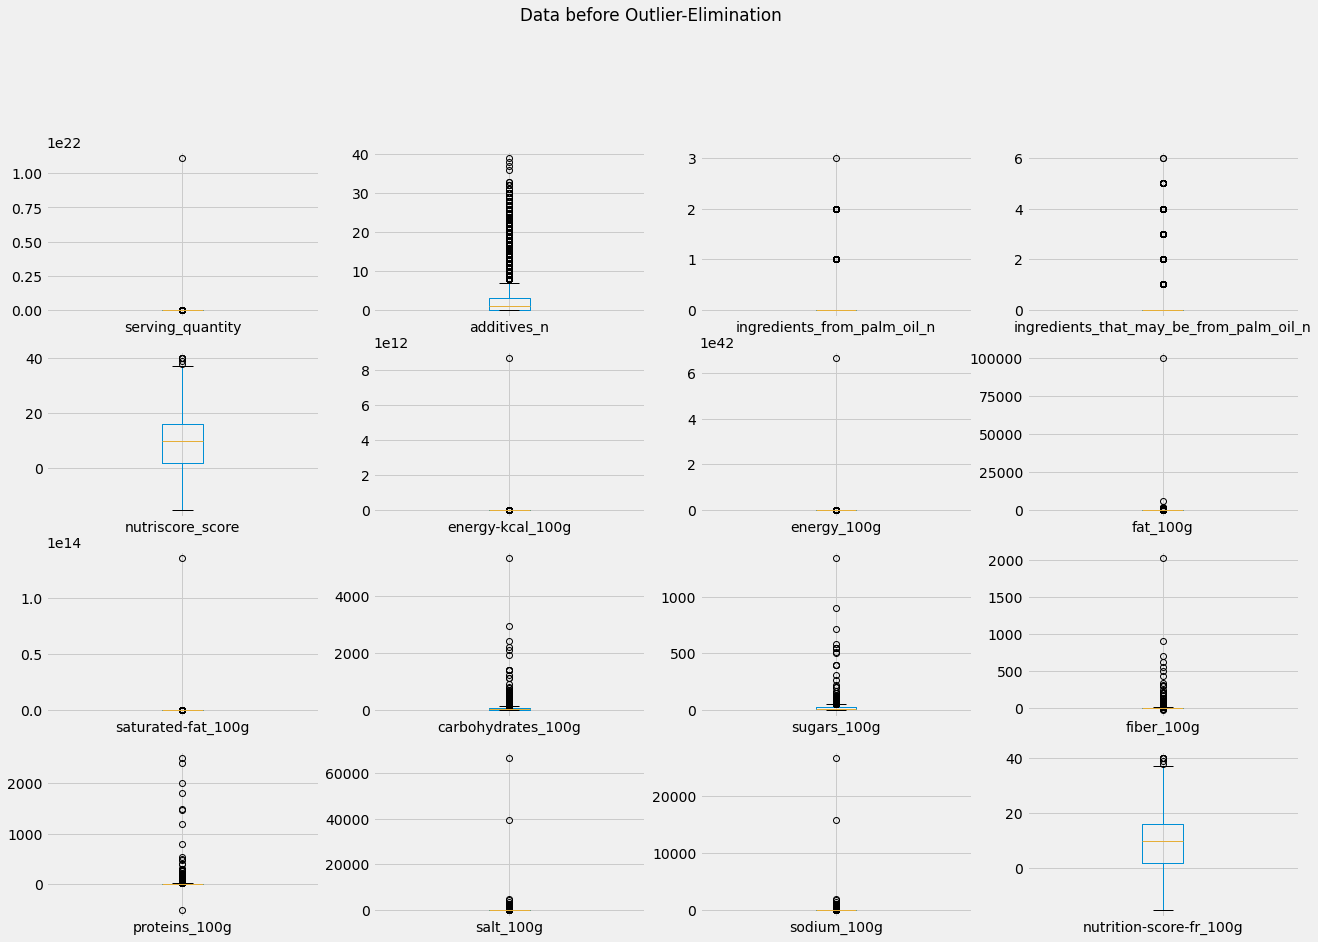

In [23]:
# boxplot for every float columns
data.select_dtypes(include=float).plot(kind='box', subplots=True, title='Data before Outlier-Elimination', figsize=(20,20), layout=(6,4))
plt.show()

### Impossible values by definition

In [24]:
for col in data.select_dtypes(include=float).columns:
    if (col == 'nutrition-score-fr_100g' or col == 'nutriscore_score'):
        # FSA nutrition score is between -15 & 40
        data = data[((data[col] >= -15) & (data[col] <= 40))]
        continue
    elif (col == 'energy-kcal_100g'):
        # Fat is the most energy dense at 9kcal/g so max is 900kcal for 100g
        data = data[((data[col] >= 0) & (data[col] <= 900))]
        continue
    elif (col == 'energy_100g'):
        # Fat is the most energy dense at 37kJ/g so max is 3700kJ for 100g
        data = data[((data[col] >= 0) & (data[col] <= 3700))]
        continue
    elif (col.endswith('_100g')):
        # Nutrient intake cannot be negative or exceed 100g
        data = data[((data[col] >= 0) & (data[col] <= 100))]    
        
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))                      

Remaining data : 309929 rows / 32 columns


### Statistical Outliers

In [25]:
%%time
# find outliers with Z-score
"""
for col in data.select_dtypes(include=float).columns:
    data = data[np.abs(data[col]-data[col].mean())<=(3*data[col].std())]
"""
# longer than IQR method

Wall time: 0 ns


'\nfor col in data.select_dtypes(include=float).columns:\n    data = data[np.abs(data[col]-data[col].mean())<=(3*data[col].std())]\n'

In [26]:
%%time
# find outliers with IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

serving_quantity                            79.600
additives_n                                  3.000
ingredients_from_palm_oil_n                  0.000
ingredients_that_may_be_from_palm_oil_n      0.000
nutriscore_score                            14.000
energy-kcal_100g                           303.000
energy_100g                               1267.000
fat_100g                                    20.030
saturated-fat_100g                           6.670
carbohydrates_100g                          50.200
sugars_100g                                 20.810
fiber_100g                                   3.600
proteins_100g                                8.600
salt_100g                                    1.188
sodium_100g                                  0.475
nutrition-score-fr_100g                     14.000
dtype: float64
Wall time: 183 ms


In [27]:
%%time
# drop outliers using IQR
print("Outliers : ", data.shape[0]-len(data[~((data.select_dtypes(include=float) < (Q1 - 1.5 * IQR)) |(data.select_dtypes(include=float) > (Q3 + 1.5 * IQR))).any(axis=1)]))
data = data[~((data.select_dtypes(include=float) < (Q1 - 1.5 * IQR)) |(data.select_dtypes(include=float) > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))

# Outliers : 138217 / Wall time: 821 ms

Outliers :  128068
Remaining data : 181861 rows / 32 columns
Wall time: 357 ms


In [28]:
data.describe()

,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,142047.000,169323.000,169323.000,169323.000,181861.000,181861.000,181861.000,181861.000,181861.000,181861.000,181861.000,181861.000,181861.000,181861.000,181861.000,181861.000
mean,72.668,1.656,0.000,0.000,6.483,243.560,1018.306,9.923,3.013,31.772,11.070,2.209,6.754,0.779,0.312,6.483
std,49.861,1.949,0.000,0.000,8.687,166.129,694.899,11.331,4.092,26.694,13.498,2.257,5.725,0.740,0.296,8.687
min,0.000,0.000,0.000,0.000,-15.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-15.000
25%,30.000,0.000,0.000,0.000,-1.000,89.000,369.000,0.700,0.000,7.600,1.410,0.000,2.000,0.100,0.040,-1.000
50%,56.000,1.000,0.000,0.000,5.000,226.000,946.000,5.000,1.000,22.500,4.500,1.700,5.880,0.640,0.256,5.000
75%,112.000,3.000,0.000,0.000,13.000,379.000,1586.000,16.670,4.640,56.760,16.810,3.600,10.000,1.210,0.484,13.000
max,227.100,7.000,0.000,0.000,36.000,868.000,3632.000,51.000,16.670,100.000,53.400,9.000,23.800,3.067,1.227,36.000


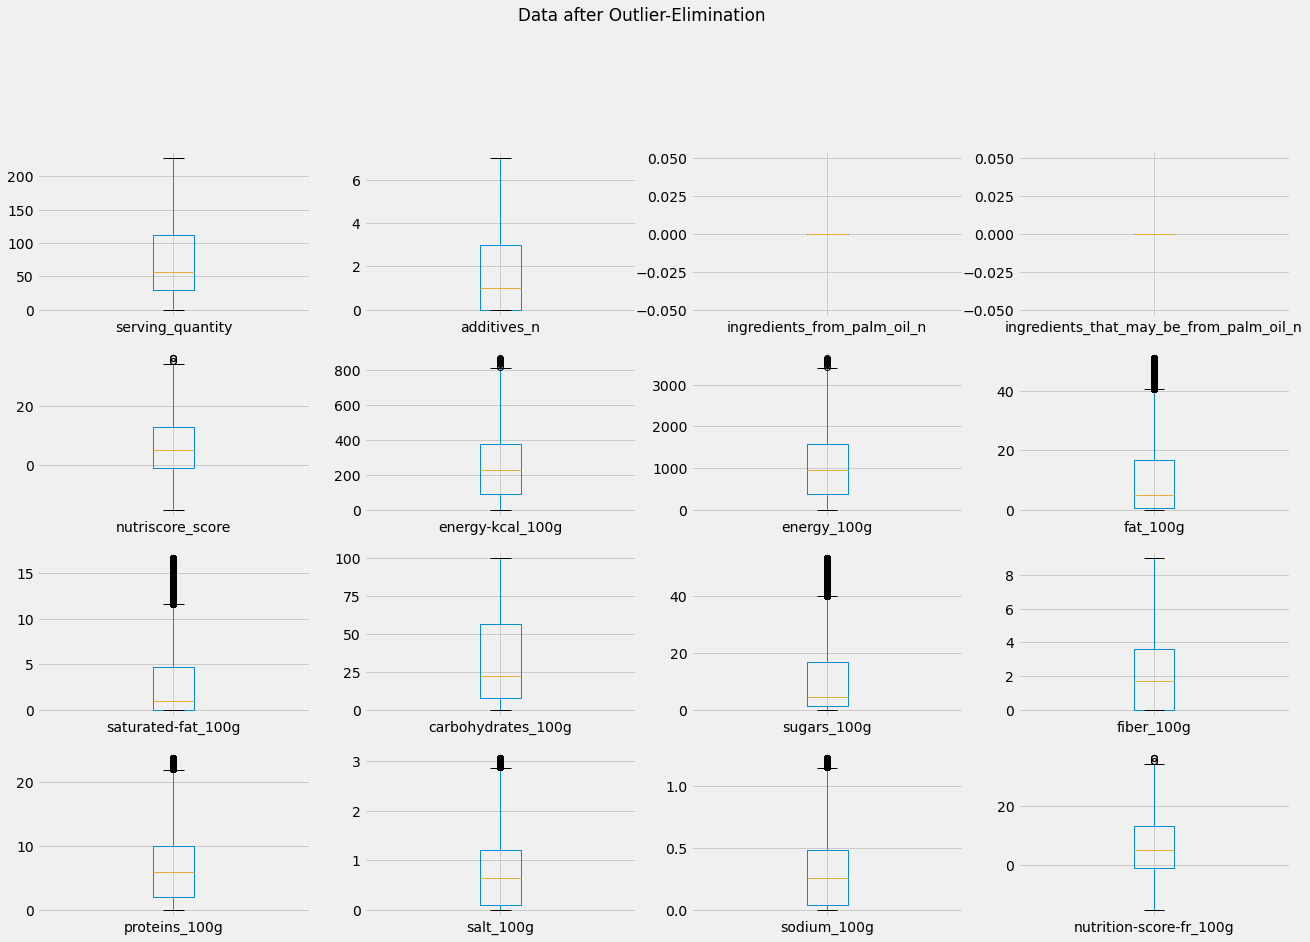

In [29]:
data.select_dtypes(include=float).plot(kind='box', subplots=True, title='Data after Outlier-Elimination', figsize=(20,20), layout=(6,4))
plt.show()

### Irrelevant data

**'nutrition-score-fr_100g' & 'nutriscore_score'** : these columns seems similar

In [30]:
print('Different values : ', data[data['nutrition-score-fr_100g'] != data['nutriscore_score']].shape[0])

Different values :  0


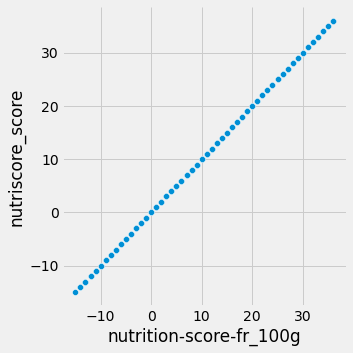

In [31]:
sns.pairplot(data, x_vars=['nutrition-score-fr_100g'], y_vars=['nutriscore_score'], height=5)
plt.show()

We can conclude that these columns are the same so we can delete one

In [32]:
# Drop one of these
data = data.drop(columns=['nutriscore_score'])

**Rename Columns with "-"**

In [33]:
# Rename columns with "-" in their name
data.rename(columns={'nutrition-score-fr_100g':'nutrition_score_100g',
                     'saturated-fat_100g':'saturated_fat_100g',
                     'energy-kcal_100g':'energy_kcal_100g'}, inplace=True)
data.columns

Index(['created_datetime', 'last_modified_datetime', 'product_name',
       'quantity', 'brands', 'categories_fr', 'labels_fr', 'countries_fr',
       'ingredients_text', 'serving_size', 'serving_quantity', 'additives_n',
       'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_grade',
       'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'main_category_fr',
       'energy_kcal_100g', 'energy_100g', 'fat_100g', 'saturated_fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition_score_100g'],
      dtype='object')

**'ingredients_from_palm_oil_n' & 'ingredients_that_may_be_from_palm_oil_n'**

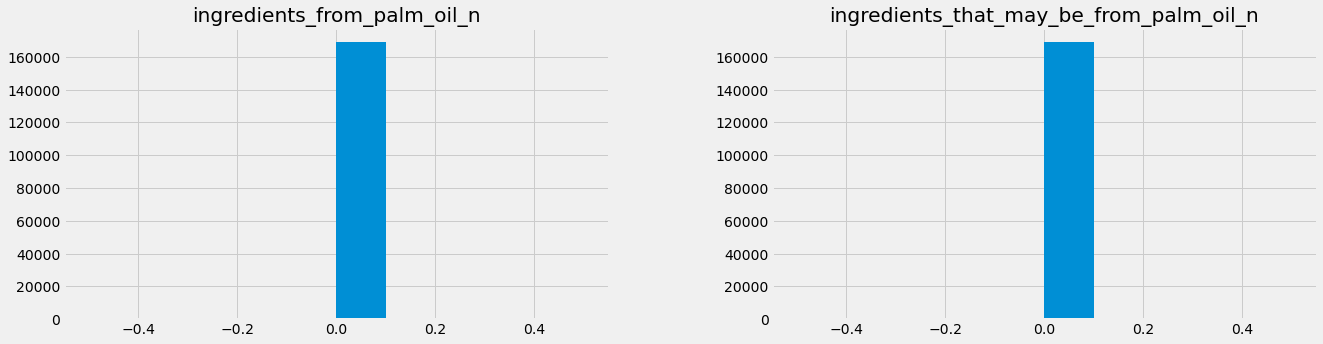

In [34]:
data.hist(column=['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n'], figsize=(20,5))
plt.show()

In [35]:
po_values = data[['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']].value_counts()
print(po_values)
print("Filling ratio of these columns : {:.2f} %".format(po_values[0][0] / data.shape[0] * 100))
del po_values

ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n
0.000                        0.000                                      169323
dtype: int64
Filling ratio of these columns : 93.11 %


These columns are not full of data and all their values are 0.  
We can consider they're not usable.

In [36]:
data = data.drop(columns=['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n'])

## 5. Numeric values imputation

In [37]:
print(data.select_dtypes(include=float).isnull().sum().sort_values())

energy_kcal_100g            0
energy_100g                 0
fat_100g                    0
saturated_fat_100g          0
carbohydrates_100g          0
sugars_100g                 0
fiber_100g                  0
proteins_100g               0
salt_100g                   0
sodium_100g                 0
nutrition_score_100g        0
additives_n             12538
serving_quantity        39814
dtype: int64


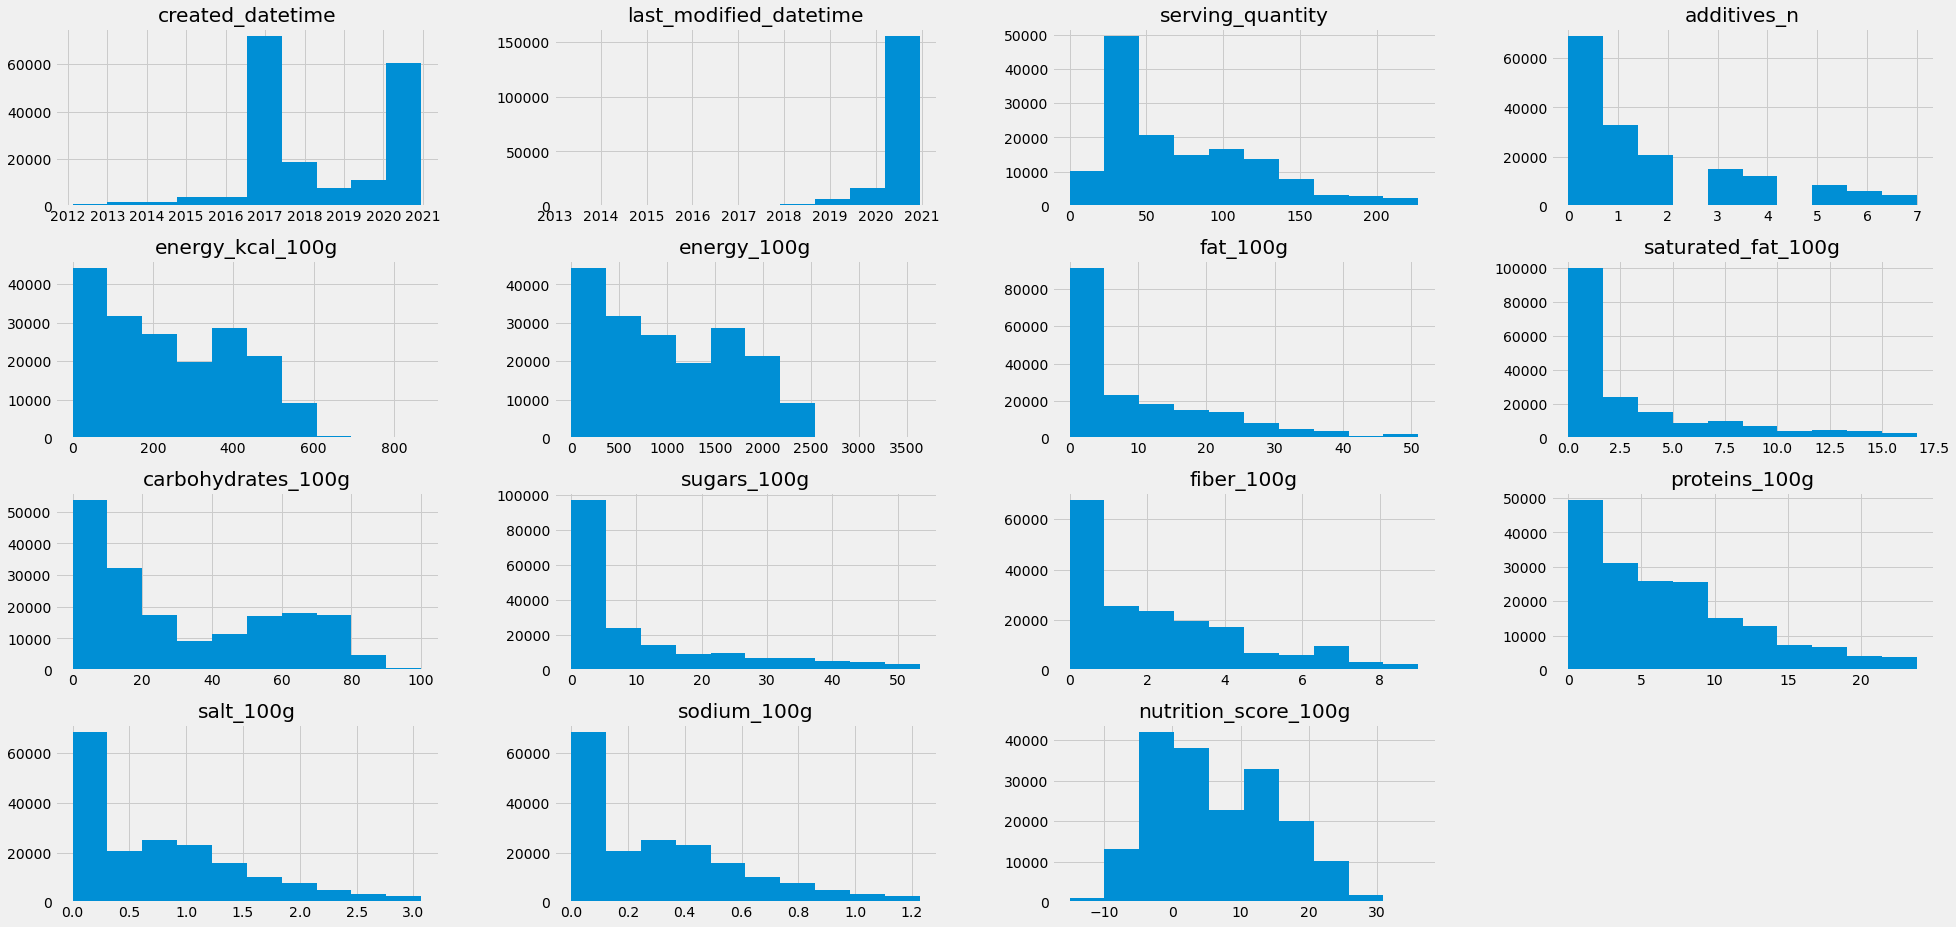

In [38]:
data.hist(figsize=(30,15), layout=(4,4))
plt.show()

**Not Normal distributions so we will use the median of each columns for the imputation of numeric values**

In [39]:
%%time
# impute missing values for numeric feature (median)

# Longer #
#from sklearn.impute import SimpleImputer
#numcols = data.select_dtypes(include=float).columns
#imp_mean = SimpleImputer( strategy='median')
#data[numcols] = imp_mean.fit_transform(data[numcols])

for col in data.select_dtypes(include=float).columns:
    data[col] = data[col].fillna(data[col].median())
print(data.select_dtypes(include=float).isnull().sum().sort_values())

serving_quantity        0
additives_n             0
energy_kcal_100g        0
energy_100g             0
fat_100g                0
saturated_fat_100g      0
carbohydrates_100g      0
sugars_100g             0
fiber_100g              0
proteins_100g           0
salt_100g               0
sodium_100g             0
nutrition_score_100g    0
dtype: int64
Wall time: 108 ms


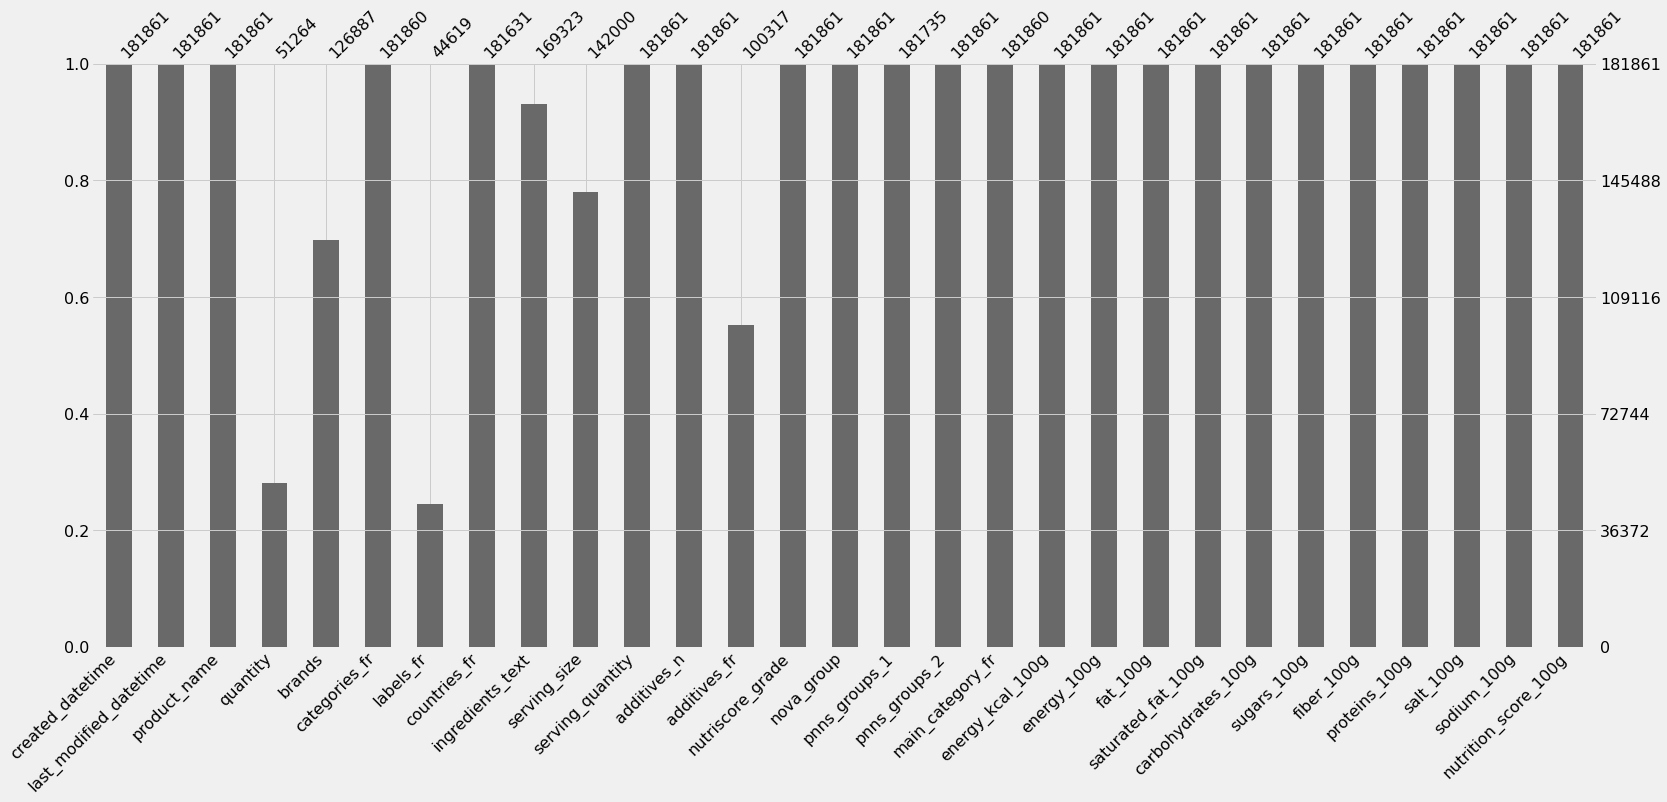

In [40]:
msno.bar(data)

In [41]:
print(data.isnull().sum().sort_values())
print("Remaining data : {} rows / {} columns".format(data.shape[0], data.shape[1]))

created_datetime               0
salt_100g                      0
proteins_100g                  0
fiber_100g                     0
sugars_100g                    0
carbohydrates_100g             0
saturated_fat_100g             0
fat_100g                       0
energy_100g                    0
energy_kcal_100g               0
pnns_groups_2                  0
sodium_100g                    0
nutriscore_grade               0
nova_group                     0
additives_n                    0
serving_quantity               0
product_name                   0
last_modified_datetime         0
nutrition_score_100g           0
main_category_fr               1
categories_fr                  1
pnns_groups_1                126
countries_fr                 230
ingredients_text           12538
serving_size               39861
brands                     54974
additives_fr               81544
quantity                  130597
labels_fr                 137242
dtype: int64
Remaining data : 181861 rows /

## 6. Save cleaned CSV

In [42]:
from datetime import datetime
#data.to_csv('cleaned-data_{}.csv'.format(datetime.now().strftime("%Y-%m-%d")), sep='\t')
data.to_csv('cleaned_data.csv', sep='\t')